In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
file_path = "generate_data/label_embeddings.csv"
df = pd.read_csv(file_path)
labels = df['Label'].values
embeddings = df.drop(columns=['Label']).values
print(f"Label: {len(labels)}, embeddings with shape: {embeddings.shape}." )

Label: 854, embeddings with shape: (854, 100).


/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/skle

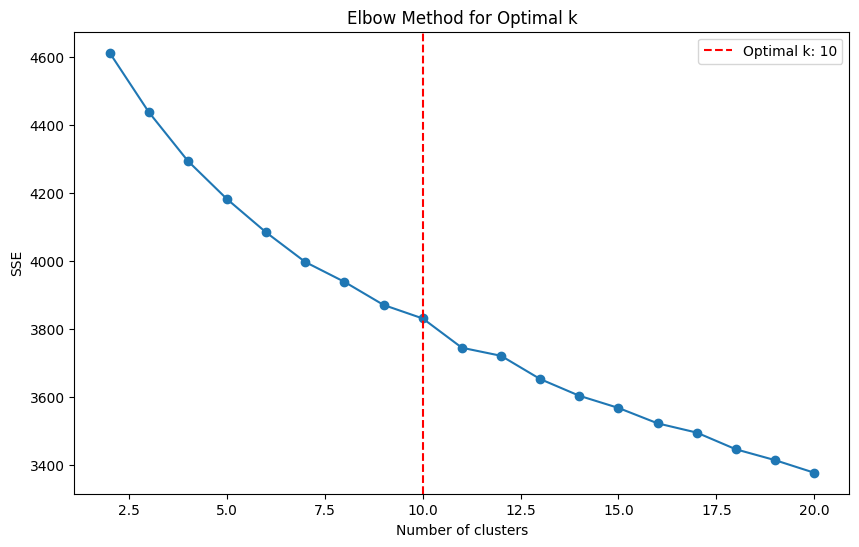

Optimal number of clusters: 10
SSE values:
Clusters: 2, SSE: 4611.50
Clusters: 3, SSE: 4436.93
Clusters: 4, SSE: 4293.00
Clusters: 5, SSE: 4180.85
Clusters: 6, SSE: 4082.87
Clusters: 7, SSE: 3995.87
Clusters: 8, SSE: 3937.51
Clusters: 9, SSE: 3869.61
Clusters: 10, SSE: 3829.86
Clusters: 11, SSE: 3743.77
Clusters: 12, SSE: 3720.10
Clusters: 13, SSE: 3651.67
Clusters: 14, SSE: 3602.52
Clusters: 15, SSE: 3566.73
Clusters: 16, SSE: 3521.44
Clusters: 17, SSE: 3494.22
Clusters: 18, SSE: 3445.09
Clusters: 19, SSE: 3413.21
Clusters: 20, SSE: 3376.21


In [5]:
# Determine the optimal number of clusters using the elbow method
def select_n_clusters(embeddings, max_clusters):
    """使用手肘法选择最佳聚类数"""
    sse = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(embeddings)
        sse.append(kmeans.inertia_)
    
    # 计算二阶差分寻找肘部
    sse_diff = np.diff(sse)
    sse_diff = np.diff(sse_diff)
    elbow_point = np.argmax(sse_diff) + 2  # +2 because we took two differences
    
    # 确保簇数合理
    if elbow_point < 2:
        elbow_point = 2
    elif elbow_point > max_clusters:
        elbow_point = max_clusters
        
    # 绘制 SSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), sse, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Optimal k: {elbow_point}')
    plt.legend()
    plt.show()
    return elbow_point, sse

# 选择最佳聚类数
optimal_k, sse = select_n_clusters(embeddings, max_clusters=20)
print(f"Optimal number of clusters: {optimal_k}")
print(f"SSE values:")
for k, sse_value in enumerate(sse, start=2):
    print(f"Clusters: {k}, SSE: {sse_value:.2f}")


/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/user/data1/zhangdaijun/miniconda3/envs/PepXML/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


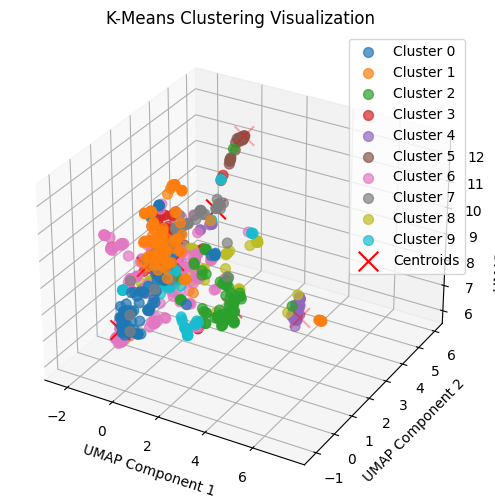

In [5]:
import umap
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# 使用UMAP进行降至3维
umap_reduce = umap.UMAP(n_components=3, random_state=42)
umap_embeddings = umap_reduce.fit_transform(embeddings)
# 3D可视化
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# 绘制聚类结果
for i in range(optimal_k):
    cluster_points = umap_embeddings[cluster_labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}', s=50, alpha=0.7)

# 绘制聚类中心
centers = umap_reduce.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=200, label='Centroids')

ax.set_title('K-Means Clustering Visualization')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.legend()
plt.show()

In [6]:
# 统计每个簇中有多少个样本
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
# 打印每个簇的样本数量
print("Cluster counts:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} labels")
    
    

Cluster counts:
Cluster 0: 89 labels
Cluster 1: 108 labels
Cluster 2: 89 labels
Cluster 3: 94 labels
Cluster 4: 46 labels
Cluster 5: 36 labels
Cluster 6: 201 labels
Cluster 7: 64 labels
Cluster 8: 72 labels
Cluster 9: 55 labels
